# 03 Numpy

In [1]:
import numpy as np

The core of the `numpy` package is the `array` class. Let's examine that first. We can make an array out of a sequence, like a list.

In [2]:
d = [1, 2, 3, 4, 5]
np.array(d)

array([1, 2, 3, 4, 5])

### data types

Unlike lists, arrays must be homogeneous, in that the data types of each element must be the same. The data type of the array is upcast to be able to represent all of the data. So, if only one element is a float, all elements will be converted to floats.

In [3]:
d = [1, 2, 3.1415, 4, 5]
np.array(d)

array([ 1.    ,  2.    ,  3.1415,  4.    ,  5.    ])

You can query the datatype by examining the `dtype` attribute of the array.

In [4]:
d = [1, 2, 3.1415, 4, 5]
arr = np.array(d)
arr.dtype

dtype('float64')

Array types may be defined explicity in the call

In [5]:
arr = np.array([1, 2, 3, 4, 5], dtype='float32')
arr

array([ 1.,  2.,  3.,  4.,  5.], dtype=float32)

Complex numbers are noted with a lowercase `j` or uppercase `J`, like this

In [6]:
cmplx = np.array([1.0+2.0j, 3.0+4.0J])
print(cmplx)
cmplx.dtype

[ 1.+2.j  3.+4.j]


dtype('complex128')

As we have seen before, arrays are like multidimensional sequences. We can create a 2D array by supplying a list of lists as the argument.

In [7]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

### Array attributes

Arrays have a few other important attributes. Note attributes never have paretheses after them. Methods always do.

In [8]:
arr.size          # The number of elements in the array

6

In [9]:
arr.shape         # The shape of the array (i.e., the size of each dimension)

(2, 3)

In [10]:
arr.ndim          # The number of dimensions of the array

2

### Setting array shape

You can set the `array.shape` attribute to change the shape of the array. This attribute does not change the elements of the array, or how it is stored in memory, just how it is seen.

In [11]:
arr.shape = (3, 2)
arr

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.]])

In [12]:
arr.shape = (6,)
arr

array([ 1.,  2.,  3.,  4.,  5.,  6.])

Singleton dimensions add to the dimensionality of an array. The last example was a 1D array, the next are 2D arrays.

In [13]:
arr.shape = (1, 6)
arr   # Note that there are *two* square brackets in the output sequence.

array([[ 1.,  2.,  3.,  4.,  5.,  6.]])

In [14]:
arr.shape = (6, 1)
arr   # this is also a 2D array, like a column vector

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])

## Array indexing

Arrays are indexed in a similar way to sequences, with `start:stop:stride` notation, except that this is used for each dimension in the array. Colons denote all the values in a particular dimension, slices indicate some particular subset of the data in that particular dimension. 

A common use case is to get a single row or column from a 2D array (a table of data).

In [15]:
arr = np.arange(60).reshape(6, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [16]:
arr[:, 4]   # the 5th column

array([ 4, 14, 24, 34, 44, 54])

In [17]:
arr[2, :]   # the 3rd row

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [18]:
arr[2]     # Trailing colons do not need to be explicitly typed. This is equivalent to the last example.

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [1]:
arr[4, 7]   # an individual element in the table

NameError: name 'arr' is not defined

---
### *Exercise*

> Slices can be combined in any way. Define a new array or use array `arr` and grab out every other row and the 4th column and above.

---

### Conventions concerning arrays containing spatio-temporal information

Generally, you will want to think of arrays as representing dimensions in space and time. The conventional way to think of this is that the dimensions are $(t, z, y, x)$; missing dimensions are omitted. This will help make plotting and analysis easier. Some examples might be:

    temp[:, :, :, :]     # A 4D array (time, height, latitude, longitude)
    press[:, :]          # A 2D array (time, height)
    humid[:, :]          # A 2D array (latitude, longitude)

## Array methods

Arrays have a number of methods. Let's take a look at the `mean` method as an example. 

In [21]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])  # reset the array to our 2x3 array.

arr.mean()        # The mean of all of the elements in the array

3.5

`Mean` takes the optional argument `axis` that can be used to take the mean along a single axis of the array. Just like with indexing, the axes are reference in a zero-based system; `axis=0` means the first dimension. 

In [22]:
arr.mean(axis=0)  # The mean 

array([ 2.5,  3.5,  4.5])

In this case, there are two rows in the first dimension, and `arr.mean(axis=0)` takes the average in the 'row' direction, resulting in a 1D array that is the average of each column.

---
### *Exercise*

> Find the mean of the array in the 'column' direction, along `axis=1`.

> Use the `sum` method of the array class to get the sum of the numbers in each column. The result should be a 1D array with three elements.

---

You can also use the `reshape` method to change the shape of an array.

In [23]:
arr.reshape(3, 2)

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.]])

You can find the mininum and maximum of an array with the `min` and `max` methods. Sometimes it is useful to find the indices of these minima and maxima. For this use `argmin` and `argmax`, like

In [24]:
x = np.random.rand(10)
imax = x.argmax()
print(imax, x[imax], x.max())

6 0.894483287781 0.894483287781


## Array views

The data for an array may be stored in memory using `C` or `FORTRAN` ordered memory. Typically, there is no need to think about this, some details can be found [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/internals.html).

However, it is important to remember that subsets of an array can produce a different 'view' of the array that addresses the same memory as the original array. This can lead to some unexpected behaviors. One way to think of this is that assignment in Python is more like a C-pointer (i.e., a reference to a memory location) than an actual value.

In [25]:
a = np.arange(10.0)
b = a[::2]
print(a)
print(b)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 0.  2.  4.  6.  8.]


In [26]:
a[4] = -999   # this will modify b as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[   0.    2. -999.    6.    8.]


In [27]:
b[-1] = -888  # this will modify a as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7. -888.    9.]
[   0.    2. -999.    6. -888.]


Normally, this will not be a problem, but if you need to make sure that a subset of an array has it's own memory, make sure you make a `copy` of the array, like

In [28]:
a = np.arange(10.0)
b = a.copy()[::2]     # or np.copy(a)
a[4] = -999   # this will modify b as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[ 0.  2.  4.  6.  8.]


## Vectorization

The best way to do mathematical operations using numpy arrays is to do `vector` operations. That is, mathematical operations are defined to be element by element, and this is done much faster than looping. As a rule of thumb, you should be very concerned if your code has more than one significant `for` loop in the numerical analysis section.

In [2]:
a = np.arange(1024.0).reshape(4, 8, 16, 2)   # a 4D array using sequential numbers
b = np.random.rand(4, 8, 16, 2)              # a 4D array using random numbers

sol = a * b       # element-by-element multiplication. This operation is about as fast as it can be on your computer.

NameError: name 'np' is not defined

### Ufuncs

`Ufunc`s or Universal functions are ways to apply a function to every element in the array. Let's check [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula):

$e^{ix} = \cos(x) + i\sin(x) $

by using universal function `real` to see if the real part of the exponential really is equal to the real part of the right-hand side of the equation, $\cos(x)$.

In [30]:
a = np.random.rand(3, 4, 5)  # create a random 3 x 4 x 5 array

res1 = np.exp(1.0J*a).real    # The `real` attribute returns the real part of a complex number
res2 = np.cos(a)

np.allclose(res1, res2)       # Checks if all of the elements are close, within some small tolerance.

True

## Array broadcasting

Arrays may be operated on using vector operations even if they are different sizes, however, they need to follow the rules of `array broadcasting`.  One way to think of this is that a larger dimension will be 'broadcast' across a singleton dimension. Generally, all of the dimensions need to be either the same size, or one of the dimension sizes for a particular dimension should be of size 1. Arrays always have as many 'singleton' dimensions to the left as needed.  For example, these arrays will all 'broadcast'

      a: 5 x 7 x 1 x 8
      b:             8
      c:     7 x 3 x 8
      d: 5 x 1 x 3 x 1
    
    sol: 5 x 7 x 3 x 8   

Let's create these arrays with random numbers

In [31]:
a = np.random.rand(5, 7, 1, 8)
b = np.random.rand(8)
c = np.random.rand(7, 3, 8)
d = np.random.rand(5, 1, 3, 1)
print(a.shape, b.shape, c.shape, d.shape)

sol = a * b * c * d
print(sol.shape)

(5, 7, 1, 8) (8,) (7, 3, 8) (5, 1, 3, 1)
(5, 7, 3, 8)


---
### *Exercise*

> Experiment with multiplying just two of the arrays together. Try to predict the resulting shape.

---

Array broadcasting sometimes requires creating new singleton dimensions in arrays. This can be done by putting `np.newaxis` in the appropriate space when indexing the array. For example

In [32]:
x = np.arange(6)   # a 1D array. shape (6,)

x1 = x[:, np.newaxis]   # 2D array, shape (6, 1)
x2 = x[np.newaxis, :]   # 2D array, shape (1, 6)

np.abs(x1 - x2)  # A 'distance' matrix, a 2D array, shape (6, 6)

array([[0, 1, 2, 3, 4, 5],
       [1, 0, 1, 2, 3, 4],
       [2, 1, 0, 1, 2, 3],
       [3, 2, 1, 0, 1, 2],
       [4, 3, 2, 1, 0, 1],
       [5, 4, 3, 2, 1, 0]])

---
### *Exercise*

> Let's alter some of the previous arrays to instead have: `b = np.random.rand(8)` and `c = np.random.rand(8, 3, 7)`. What happens when you try to multiply these together? How can you fix it so it works?

---

## Combining and splitting arrays

Generally, arrays can be combined with the `np.concatenate` function. The arguments are a sequence of arrays to join, and the axis along which to join them (default=0).

There are a number of convenience functions that act like concatenate for specific axes:

 - `np.vstack` – vertical stack (stack along axis=0)
 - `np.hstack` – horizontal stack (stack along axis=1)
 - `np.dstack` – depth stack (stack along axis=2)



In [33]:
x = np.random.rand(4, 5, 6)
y = np.random.rand(4, 5, 6)

print(np.concatenate((x, y)).shape)
print()
print(np.concatenate((x, y), axis=0).shape)
print(np.concatenate((x, y), axis=1).shape)
print(np.concatenate((x, y), axis=2).shape)
print()
print(np.vstack((x, y)).shape)
print(np.hstack((x, y)).shape)
print(np.dstack((x, y)).shape)

(8, 5, 6)

(8, 5, 6)
(4, 10, 6)
(4, 5, 12)

(8, 5, 6)
(4, 10, 6)
(4, 5, 12)


Likewise, arrays can be split with `np.split` or `np.array_split`. There are also convinience functions to split horizontally, vertically, and with depth.

In [34]:
x = np.random.rand(12, 2, 5)
np.split(x, 4, axis=0)[2].shape

(3, 2, 5)

---
### *Exercise*

> Create a random array of shape (40, 50, 60). Split it along axis=1 five ways. Concatentate it along axis=2.

> What is the resulting shape?  _[Advanced: can you calculate this on one line?]_

---

## Flattening arrays with `a.flat` and `a.flatten()`

There are two basic ways to turn any array into a 1D array. They are slightly different.

`a.flatten()` returns a copy of an array, in one dimension.

In [35]:
a = np.arange(12).reshape(3, 4)
print(a)
b = a.flatten()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


the `flat` ~attribute on the other hand gives a ~view of the array in 1D. It looks like an iterator object (like `range` and `zip`). This allows

In [36]:
a.flat[6] = -999
print(a)

[[   0    1    2    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


In contrast, this does not work as expected.  _WHY?_

In [37]:
a.flatten()[5] = -888
print(a)

[[   0    1    2    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


Other operations can be done to the array first. For example, we can take a transpose of the array before we flatten it.

In [38]:
a.T.flat[6] = -999
print(a)

[[   0    1 -999    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


Here, the `T` attribute (equivalent to the `a.transpose()` method) gives a view of the array transposed (similar to MATLAB's tick notation).

In [39]:
print(a.T)

[[   0    4    8]
 [   1    5    9]
 [-999 -999   10]
 [   3    7   11]]


## Creating standard arrays

There are a few standard arrays, for example, arrays filled with zeros or ones (or empty). Here are some examples of creating arrays

In [40]:
o = np.ones((3, 4, 5))    # The argument is a shape, so is a tuple with the length of each dimension as an argument
b = np.ones((2, 3), dtype=np.bool)
z = np.zeros((2, 3), dtype=np.float32)

b

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

You can also create these arrays with the same shape and datatype of the input array using `np.ones_like` and `np.zeros_like`.

In [41]:
zb = np.zeros_like(b)
zb

array([[False, False, False],
       [False, False, False]], dtype=bool)

You can also create a diagonal array with a given vector along the diagonal. These can be offset with an optional argument `k` (default=0). This example creates a tri-diagonal array similar to that used for finite difference calculations

In [42]:
np.diag(-2*np.ones(6)) + np.diag(np.ones(5), k=-1) + np.diag(np.ones(5), k=1)

array([[-2.,  1.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  1., -2.]])

There are also a number of ways to generate sequences of numbers.
 - `np.arange([start,] stop [[, stride]])` Create a sequence of numbers, similar to `range`
 - `np.linspace(min, max, length)` Create a uniform series of specified `length` between `min` and `max`, inclusive.
 - `np.logspace(minpow, maxpow, length)` Create a uniform series in logspace of specified `length` between `10**minpow` and `10**maxpow`, inclusive.
 

In [43]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

In [45]:
np.linspace(2, 4, 17)

array([ 2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,  4.   ])

In [46]:
np.logspace(-2, 2, 9)

array([  1.00000000e-02,   3.16227766e-02,   1.00000000e-01,
         3.16227766e-01,   1.00000000e+00,   3.16227766e+00,
         1.00000000e+01,   3.16227766e+01,   1.00000000e+02])

## Finding values

There are a number of ways to find values in an array. The simplest is always to create a boolean array, like

In [47]:
x = np.random.rand(5, 5)
print(x)
ind = x > 0.5
print(ind)

[[ 0.220552    0.34681952  0.45636442  0.70567419  0.12819055]
 [ 0.93887285  0.31415635  0.80252072  0.00156153  0.931407  ]
 [ 0.15761823  0.88112976  0.91574267  0.7282318   0.84946384]
 [ 0.82108323  0.89699191  0.38395095  0.70408744  0.02185136]
 [ 0.877744    0.35156972  0.16823124  0.22235544  0.71564767]]
[[False False False  True False]
 [ True False  True False  True]
 [False  True  True  True  True]
 [ True  True False  True False]
 [ True False False False  True]]


The boolean array can be used as an index to other arrays. Note this will return a 1D array, no matter what dimension the origial arrays are, because there is no way to know what structure the true values have.

In [48]:
x = np.random.rand(5, 5)
y = np.sin(x)

y[x > 0.5]
# or, equivalently, as two lines
# idx = x > 0.5
# y[idx]

array([ 0.71112691,  0.62317376,  0.66259816,  0.67303315,  0.62458958,
        0.71856884,  0.83678262,  0.7164414 ,  0.68361347,  0.69233788,
        0.65655359,  0.83502252,  0.74678906,  0.73999431,  0.82090332,
        0.81472222,  0.80168156])

To get the indices of the places where the conditional is true (i.e., the locations of the `True` values in the boolean array), use the `np.where` command. 

In [49]:
x = np.random.rand(5, 5)
idx = np.where(x > 0.5)
idx

(array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4]),
 array([0, 3, 4, 1, 4, 0, 2, 4, 0, 1, 2, 0, 3]))

Note that `np.where` ~always returns a tuple of indices for each dimension. This is a little strange for 1D arrays, but is done for consistancy across all input values. Often, you will want to explicitly pull out the (single) array of indices from the tuple, like

In [50]:
x = np.random.rand(10)
idx = np.where(x>0.5)[0]
print(idx)

[1 4 6 8]


_What happens with the [0] is missing behind the call to `where`?_

---
### *Exercise*

> You can also use these calculated indices, or boolean matricies on the left hand side for assignment.

> Create a 10x10 random array, with values between 0 and 1. Replace all of the numbers smaller than 0.5 with zero.

---

## Importing data

One of the basic commands in numpy for loading in data is the `loadtxt` command. There are other ways to do this, such as the [`genfromtxt`](http://docs.scipy.org/doc/numpy-dev/user/basics.io.genfromtxt.html) command, but `loadtxt` is sufficient for most purposes, and is easy to use.

In [51]:
data = np.loadtxt('03_CTD.dat', comments='*')
data[:,2]    # a column of data representing temperature

array([ 26.5827,  25.9263,  25.3695,  25.2304,  24.568 ,  24.6885,
        24.7855,  24.7213,  24.5692,  24.3945,  24.3252,  24.2424,
        24.1822,  24.1057,  23.9863,  23.9235,  23.8288,  23.7446,
        23.6302,  23.711 ,  23.6082,  23.4458,  23.4764,  23.4612,
        23.4353,  23.4063,  23.358 ,  23.3041,  23.2337,  23.1621,
        23.1239,  23.045 ,  23.0066,  22.9947,  22.9833,  22.9804,  22.9798])

## Linear algebra

One of the key elements of the `numpy` package is the `numpy.linalg` subpackage that contains a number of linear algebra functions that work efficiently on arrays.

In [52]:
a = np.random.randn(100, 100)
e, v = np.linalg.eig(a)

b = np.random.randn(500, 200)
u, s, v = np.linalg.svd(b)

Matrix multiplication is done using the `np.dot` function. In this case, matricies do _not_ need to be the same shape, but must follow the rules of matrix multiplication. E.g., the operation dot(<4x5 array>, <5x12 array>) results in a 4x12 array; i.e., the inner dimensions must match (technically last and second-to-last, for arrays with more than two dimensions).   

In [53]:
x = np.random.rand(4, 5)
y = np.random.rand(5, 12)

res = np.dot(x, y)
print(res.shape)

# np.dot(y, x)  # This gives an error -- order is important.

(4, 12)


## Polynomial fitting

The basic function for fitting a polynomial (e.g., a straight line) is `np.polyfit(x, y, deg)`. There are a number of other functions that let you add (`np.polyadd`), multiply (`np.polymul`), find zeros (`np.roots`), and do other operations to polynomials.

In [54]:
x = np.random.rand(100)
y = 5 + 3*x + 0.1*np.random.randn(100)   # A line with some noise

p = np.polyfit(x, y, 1)
print(p)  # The coefficients of the polynomial, with hightest order first. (i.e,. [slope, intercept])

[ 2.99012263  5.01301065]


You can also use the `np.polynomial.Polynomial` class to work with polynomials. Note, these define polynomials the opposite way, with the _lowest_ order first. The Polynomial class gives an excellent example of operator overloading, and the flexibility of classes.

In [75]:
p1 = np.polynomial.Polynomial([5, 3])         # y = 5 + 3 x
p2 = np.polynomial.Polynomial([3, 6, 8, 2])   # y = 3 + 6 x + 8 x**2 + 2 x**3

print('Evaluation')
print('p1(0.0) = ', p1(0))
print('p1(5.0) = ', p2(5))
print()
print('Roots')
print('Roots of p2 = ', p2.roots())
print()
print('Operations')
print('p1 + p2 = ', p1 + p2)
print('p1 * p2 = ', p1 * p2)
print()
print('Calculus')
print('Derivative of p1', p1.deriv(1))
print('Inegral of p2', p2.integ(4, k=[4, 3, 2, 1]))

Evaluation
p1(0.0) =  5.0
p1(5.0) =  483.0

Roots
Roots of p2 =  [-3.21124270+0.j         -0.39437865-0.55818847j -0.39437865+0.55818847j]

Operations
p1 + p2 =  poly([ 8.  9.  8.  2.])
p1 * p2 =  poly([ 15.  39.  58.  34.   6.])

Calculus
Derivative of p1 poly([ 3.])
Inegral of p2 poly([ 1.          2.          1.5         0.66666667  0.125       0.05
  0.02222222  0.00238095])


## Basic performance evaluation

We can do some very basic perfomance testing using the `%time` special function in ipython notebooks. Lets use this to examine the time it takes to do a singular value decomposition for different sized matricies.

In [56]:
b = np.random.randn(500, 200)
%time u, s, v = np.linalg.svd(b)

CPU times: user 48.9 ms, sys: 11 ms, total: 60 ms
Wall time: 34 ms


If the time might change, say based on the values chosen, the `%timeit` function can be used to perform the test a number of times to get an average calculation time.

In [57]:
%timeit b = np.random.randn(50, 20); u, s, v = np.linalg.svd(b)

1000 loops, best of 3: 243 µs per loop


For statements that are longer than a single line, the `time.time` function can be used.

In [58]:
import time

t_start = time.time()
time.sleep(0.25)   # Do nothing for 0.25 seconds
t_stop = time.time()

print('{:6.4f} seconds have passed.'.format(t_stop-t_start))

0.2522 seconds have passed.


## Masked arrays

Masked arrays are ways to create arrays with missing values. MATLAB&trade; uses NaNs (NaN stands for 'Not a Number'), and the NaNs are the values of the arryas at those points. This approach also works in Python. Masked arrays are preffered since they retain the masked array vaules, also some plotting routines require masked arrays when plotting arrays with missing values. Masked arrays are usually created through some condition, like

In [59]:
arr = np.random.randn(7, 8)
cond = np.random.rand(7, 8) > 0.5   # `cond` is True for the random values greater than 0.5

marr = np.ma.masked_where(cond, arr)

print(marr)

np.allclose(marr.data, arr)

[[1.2402461567394076 0.35677438097883124 -- 0.046582209792698726
  0.37442517990105206 -- -1.438638726814952 -1.1523996450053955]
 [-0.14904058880454102 -- -- -- -- -- -- -1.5793039293155757]
 [0.038671376658502746 1.0808807316567104 -1.3545658571213814
  0.4440517462419995 -- -- 0.6144373506141454 -0.06816265216324335]
 [-- -- -- -- -0.7665678742366981 -0.5273616182818771 -0.47199337257918905
  --]
 [-0.9110849782191676 0.5031697618783807 0.5250578331314959
  0.2313446550532793 -- -- -- --]
 [-- -- 0.870695870459877 0.6546762886696736 -- -- 0.05691324060313666
  -0.16917873406532863]
 [-- -1.241488172881262 -- 0.6505066980933726 1.0063082924537465 -- -- --]]


True

The mask can also be supplied explicity when creating the masked array,

In [60]:
marr = np.ma.masked_array([1, 2, 3, 4, 5], mask=[True, True, False, False, True])
marr

masked_array(data = [-- -- 3 4 --],
             mask = [ True  True False False  True],
       fill_value = 999999)

## Overview of scipy packages

The `scipy` package contains a number of specialized numerical computational tools. These tools are usually very specific, and in the case of the linear algebra tools, may be optimized for your particular hardware.

     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     lib                          --- Python wrappers to external libraries
     lib.lapack                   --- Wrappers to LAPACK library
     linalg                       --- Linear algebra routines
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG) [*]
     special                      --- Airy Functions [*]
     lib.blas                     --- Wrappers to BLAS library [*]
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers [*]
     stats                        --- Statistical Functions [*]
     lib                          --- Python wrappers to external libraries
                                      [*]
     lib.lapack                   --- Wrappers to LAPACK library [*]
     integrate                    --- Integration routines [*]
     ndimage                      --- n-dimensional image package [*]
     linalg                       --- Linear algebra routines [*]
     spatial                      --- Spatial data structures and algorithms
     special                      --- Airy Functions
     stats                        --- Statistical Functions


In [61]:
import scipy   # This actually does nothing. Submodules must be explicitly imported

## `scipy.stats`

In [62]:
import scipy.stats

In [63]:
rv = scipy.stats.laplace(loc=0, scale=1)
rv.pdf(np.linspace(-3, 3, 101))    # create a pdf of the laplace distribution with parameters loc=0, scale=1

array([ 0.02489353,  0.02643286,  0.02806738,  0.02980297,  0.03164588,
        0.03360276,  0.03568063,  0.037887  ,  0.0402298 ,  0.04271748,
        0.04535898,  0.04816382,  0.0511421 ,  0.05430455,  0.05766256,
        0.06122821,  0.06501436,  0.06903462,  0.07330348,  0.07783632,
        0.08264944,  0.0877602 ,  0.09318699,  0.09894935,  0.10506804,
        0.11156508,  0.11846388,  0.12578928,  0.13356765,  0.14182701,
        0.15059711,  0.15990951,  0.16979776,  0.18029747,  0.19144644,
        0.20328483,  0.21585526,  0.22920301,  0.24337613,  0.25842567,
        0.27440582,  0.29137413,  0.3093917 ,  0.32852341,  0.34883816,
        0.37040911,  0.39331393,  0.41763511,  0.44346022,  0.47088227,
        0.5       ,  0.47088227,  0.44346022,  0.41763511,  0.39331393,
        0.37040911,  0.34883816,  0.32852341,  0.3093917 ,  0.29137413,
        0.27440582,  0.25842567,  0.24337613,  0.22920301,  0.21585526,
        0.20328483,  0.19144644,  0.18029747,  0.16979776,  0.15

In [64]:
r = scipy.stats.laplace.rvs(size=100) # Generate 100 random numbers based on the laplace distribution
r

array([-1.80549671, -0.07875653, -0.17378049, -0.20912034,  0.59067176,
        0.18206833, -4.77836574, -1.47307394, -0.45094549,  1.06834038,
       -0.89109802,  0.61593534,  2.594838  , -0.0991236 , -1.5145793 ,
       -2.49663956, -0.37871668,  0.05864587, -0.65033248, -0.65863246,
       -0.62816924,  1.36039647, -0.49696185, -5.86108017,  0.576434  ,
       -0.8589104 , -1.26704065, -1.59931239,  0.09706474,  4.35488553,
        0.33221897, -0.06889675, -0.46181798, -0.08975111,  1.43134367,
        0.59918078, -1.2304882 , -1.2178348 ,  0.8300955 , -0.63278347,
        0.5753631 ,  1.93445191,  0.5968755 , -0.27236429,  1.08482977,
        0.06680206, -0.10194774, -0.00940622, -0.19456731, -0.02345452,
        0.14409073,  0.47838717,  0.18132819, -0.35513231,  0.08351409,
       -0.97488327, -0.11449839, -1.44175066,  2.91964152,  0.2456681 ,
        0.47876928, -0.78303112,  1.40580049,  0.17774891, -0.1339678 ,
       -0.93235852, -0.47578112,  1.0523634 , -0.10410758,  0.14

## `scipy.integrate`

In [65]:
import scipy.integrate

sigma=10.0
beta=8.0/3.0
rho=28.0

def lorenz(state, to):
    x, y, z = state
    xdot = sigma*(y-x)
    ydot = x*(rho-z)-y
    zdot = x*y - beta*z
    return (xdot, ydot, zdot)
    
t = np.linspace(0, 30, 3000)
sol = scipy.integrate.odeint(lorenz, (1., 2., 3.), t)
x, y, z = sol.T

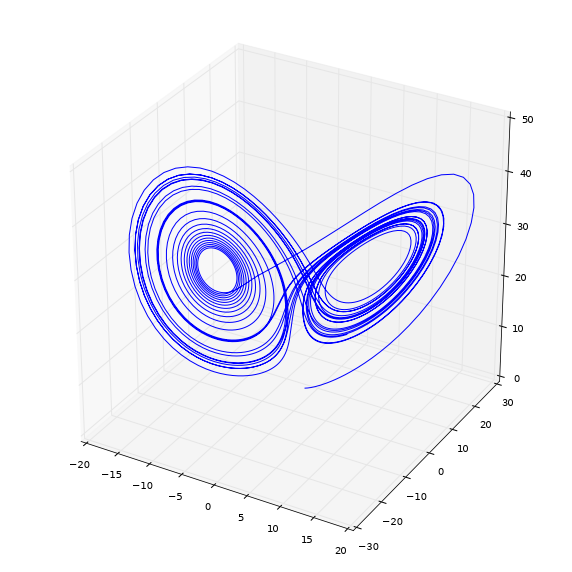

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)